In [1]:
library(tidytext)
library(stringr)
library(tidyverse)
library(tibble)
library(ggplot2)
library(lubridate)
library(SnowballC)
library(RSQLite)

Warning message:
“package ‘tidytext’ was built under R version 3.5.1”── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ readr   1.1.1
✔ tibble  1.4.2     ✔ purrr   0.2.4
✔ tidyr   0.8.0     ✔ dplyr   0.7.4
✔ ggplot2 2.2.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date

Warning message:
“package ‘SnowballC’ was built under R version 3.5.1”

In [2]:
system('head -n 1 ../../data/facebook3March18to1Sep18/0_sorted.csv', intern = TRUE)

[1] "1035678576325025792,1035678576325025792,1850148601,kris_jayne,0,2018-08-31 19:59,★★LABOR DAY #GIVEAWAY★★ Up for grabs: (1) e-book copy of: Thirsty Hearts Series: Books 1-4 + Bonus Novella - To enter: Check out my pinned post on my #facebook page! - https://m.facebook.com/krisjayneauthor/ … - #Giveaway #LaborDay #FreeBooks #EnterNow #KrisJayne #thirstyheartsseries #RTpic.twitter.com/3Zb2Oqr1ZW,0,0,1,,#GIVEAWAY #facebook #Giveaway #LaborDay #FreeBooks #EnterNow #KrisJayne #thirstyheartsseries #RTpic,/kris_jayne/status/1035678576325025792,https://m.facebook.com/krisjayneauthor/,0,0,0,,,,,"

In [3]:
system('tail -n 1 ../../data/facebook3March18to1Sep18/0_sorted.csv', intern = TRUE)

[1] "Tweet ID, Conversation ID, Author Id , Author Name, isVerified, DateTime, Tweet Text, Replies, Retweets, Favorites, Mentions, Hashtags, Permalink, URLs, isPartOfConversation, isReply, isRetweet, Reply To User ID, Reply To User Name, Quoted Tweet ID, Quoted Tweet User Name, Quoted Tweet User ID"

In [4]:
con = dbConnect(SQLite(), dbname="../../data/twitter.db")
tweets_df = dbGetQuery(con, 'select * from facebook where DateTime > "2018-03-03" and DateTime < "2018-05-03" ')
#tweets_df <- read.csv('../../data/facebook3March18to1Sep18/0_sorted.csv') 
head(tweets_df)

TweetID,ConversationID,AuthorId,Author Name,isVerified,DateTime,TweetText,Replies,Retweets,Favorites,⋯,Permalink,URLs,isPartOfConversation,isReply,isRetweet,ReplyToUserID,ReplyToUserName,QuotedTweetID,QuotedTweetUserName,QuotedTweetUserID
991887071487946754,991887071487946754,737333614518620161,DigitalLeadersA,0,2018-05-02 23:48,Over The Internet No One Can ‘Hear’ you scream https://buff.ly/2jpflKI by @imoyse via @DigitalLeadersA #socialmedia #socialselling #ohmygod #facebook #data #gdprpic.twitter.com/IHseSQOk41,0,3,2,⋯,/DigitalLeadersA/status/991887071487946754,https://buff.ly/2jpflKI,0,0,0,,,,,
991886944123600896,991760296841752583,606152349,Dawniewouldnt,0,2018-05-02 23:47,#Emerdata #Emerdata is #CambridgeAnalytica #CambridgeAnalytica #Parscale @parscale #Facebook #DataFarm,0,1,1,⋯,/Dawniewouldnt/status/991886944123600896,,1,0,0,,,,,
991886869850976257,991886869850976257,1326825139,CharlotteKent20,0,2018-05-02 23:47,Do you follow our #CaptainsPointStories #blog via @AAPublishingLLC 's website? Check out the latest installment! https://annieacornpublishing.com/promotions/captains-point-series-goodreads-posts … Also available on #Goodreads and on #Facebook! @Annie_Acorn @JulietteHill1 #Contemporary #Romantic #Fictionpic.twitter.com/8y3XZHMyaP,0,2,1,⋯,/CharlotteKent20/status/991886869850976257,https://annieacornpublishing.com/promotions/captains-point-series-goodreads-posts,0,0,0,,,,,
991886806554570752,991886806554570752,2304720642,vikramwkarve,0,2018-05-02 23:46,Retweeted Jagrati Shukla ( @JagratiShukla29): The #London-based analytics company #CambridgeAnalytica is shutting down operations effective Wednesday; following the massive #Facebook data breach scandal. #dataleak #CambridgeAnalytics,1,0,1,⋯,/vikramwkarve/status/991886806554570752,,0,0,0,,,,,
991886783783686145,991886783783686145,1293576662,kevyna30,0,2018-05-02 23:46,just log out #Facebook for tonight,0,0,0,⋯,/kevyna30/status/991886783783686145,,0,0,0,,,,,
991886769762197505,991886769762197505,7628742,japonton,1,2018-05-02 23:46,Cierra Cambridge Analytica tras uso indebido de datos #Facebook https://www.unocero.com/noticias/redes-sociales/cierra-cambridge-analytica/ …,2,4,18,⋯,/japonton/status/991886769762197505,https://www.unocero.com/noticias/redes-sociales/cierra-cambridge-analytica/,0,0,0,,,,,


In [5]:
remove_reg <- "&amp;|&lt;|&gt;"
#unnest_reg  <- "([^A-Za-z_\\d#@']|'(?![A-Za-z_\\d#@]))"

tidy_tweets <- tweets_df %>% 

filter(!str_detect(TweetText, "^RT")) %>%
mutate(text = str_remove_all(TweetText, remove_reg)) %>%

unnest_tokens(word, text, token = "tweets") %>%
mutate(word=wordStem(word, language = 'english')) %>%

filter(!word %in% stop_words$word,
     !word %in% str_remove_all(stop_words$word, "'"),
     str_detect(word, "[a-z]"))

In [6]:
tidy_tweets$DateTime <- tidy_tweets$DateTime %>% as.Date(format = '%Y-%m-%d')
str(tidy_tweets)

'data.frame':	10576300 obs. of  23 variables:
 $ TweetID             : chr  "991887071487946754" "991887071487946754" "991887071487946754" "991887071487946754" ...
 $ ConversationID      : chr  "991887071487946754" "991887071487946754" "991887071487946754" "991887071487946754" ...
 $ AuthorId            : chr  "737333614518620161" "737333614518620161" "737333614518620161" "737333614518620161" ...
 $ Author Name         : chr  "DigitalLeadersA" "DigitalLeadersA" "DigitalLeadersA" "DigitalLeadersA" ...
 $ isVerified          : chr  "0" "0" "0" "0" ...
 $ DateTime            : Date, format: "2018-05-02" "2018-05-02" ...
 $ TweetText           : chr  "Over The Internet No One Can ‘Hear’ you scream https://buff.ly/2jpflKI by @imoyse via @DigitalLeadersA #socialm"| __truncated__ "Over The Internet No One Can ‘Hear’ you scream https://buff.ly/2jpflKI by @imoyse via @DigitalLeadersA #socialm"| __truncated__ "Over The Internet No One Can ‘Hear’ you scream https://buff.ly/2jpflKI by @imoyse via 

In [7]:
summary(tidy_tweets$DateTime)

Min.      1st Qu.       Median         Mean      3rd Qu.         Max. 
"2018-03-04" "2018-03-22" "2018-04-04" "2018-04-03" "2018-04-14" "2018-05-02"

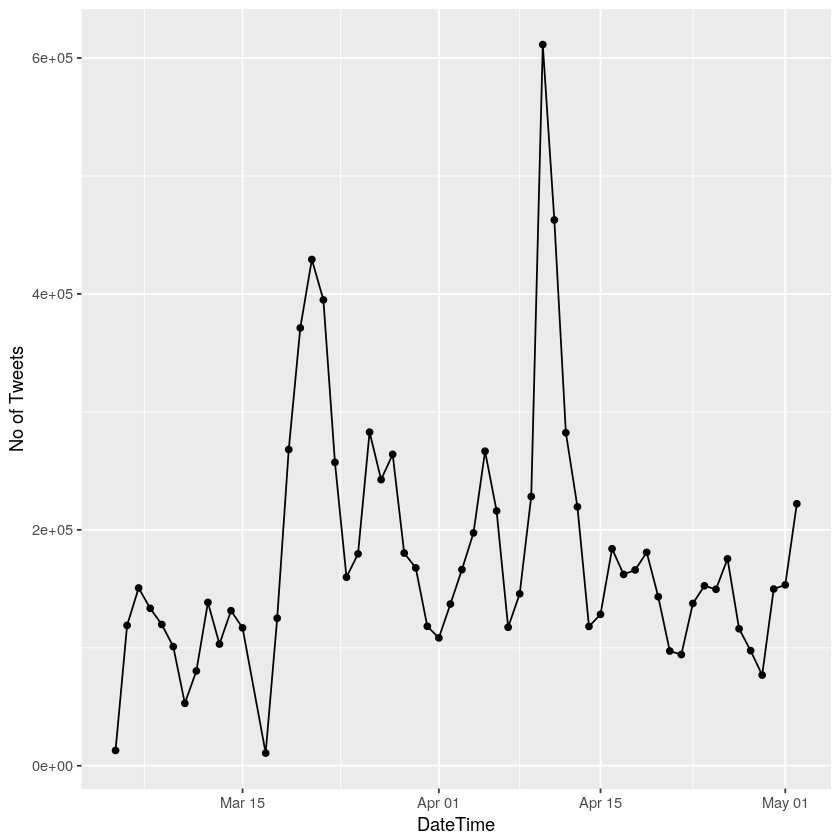

In [8]:
tidy_tweets %>% count(DateTime) %>% 
ggplot() + aes(x=DateTime, y=n) + geom_line() +geom_point() + ylab('No of Tweets')


Calculate frequency of words against each month

In [9]:
tidy_tweets_freq <- tidy_tweets %>% mutate(week = week(DateTime)) %>% group_by(week) %>% count(word, sort=TRUE) %>% 
left_join(tidy_tweets %>% mutate(week = week(DateTime)) %>% group_by(week) %>% summarize(total=n())) %>% 
mutate(freq = n/total) %>% mutate(logn = round(log(n))) %>% select(week, word, freq, n, logn, total)
tidy_tweets_orig <- tidy_tweets_freq

Joining, by = "week"


In [10]:
n=50
tidy_tweets_freq <- tidy_tweets_orig %>% arrange(desc(n))  %>% group_by(week) %>% top_n(freq, n=n) 
tidy_tweets_freq %>% arrange(week)

week,word,freq,n,logn,total
9,#facebook,0.073163210,949,7,12971
9,#twitter,0.012335209,160,5,12971
9,#instagram,0.011795544,153,5,12971
9,en,0.009251407,120,5,12971
9,de,0.008711742,113,5,12971
9,facebook,0.007246935,94,5,12971
9,#socialmedia,0.006475985,84,4,12971
9,#youtub,0.006475985,84,4,12971
9,la,0.006167605,80,4,12971
9,page,0.005088274,66,4,12971


Let's convert words to columns (dimensions)

In [11]:
tidy_tweets_plot <- tidy_tweets_freq %>% select(-n,-total, -logn) %>% spread(week, freq, fill = 0)
tidy_tweets_ca <- tidy_tweets_freq %>% select(-n, -freq,-total) %>% spread(week, logn, fill = 0)

In [12]:
saveRDS(tidy_tweets_ca, file = paste0('../../data/tidy_tweets_per_week_log_facebook_',n,'.rds'))
tidy_tweets_ca

word,9,10,11,12,13,14,15,16,17,18
#actu,3,8,7,0,8,8,0,8,8,7
#amazon,0,7,7,0,0,0,0,0,7,0
#busi,3,7,7,0,0,0,0,7,7,7
#cambridgeanalyt,0,0,0,9,7,0,0,0,0,0
#cambridgeanalytica,0,0,7,10,8,8,9,8,7,7
#congress,0,0,0,0,0,0,8,0,0,0
#data,0,0,0,8,8,8,8,8,7,0
#date,0,0,0,0,0,0,0,0,0,7
#deletefacebook,0,0,0,9,8,7,8,0,0,0
#digitalmarket,0,7,7,0,0,0,0,7,7,0


In [13]:
#saveRDS(tidy_tweets_plot, file = paste0('../../data/tidy_tweets_per_week_log_facebook_',n,'.rds'))
tidy_tweets_plot

word,9,10,11,12,13,14,15,16,17,18
#actu,0.002544137,0.002491810,0.002746884,0.000000000,0.001648050,0.001747103,0.000000000,0.001990578,0.002294021,0.002037020
#amazon,0.000000000,0.001300706,0.001128156,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.001350138,0.000000000
#busi,0.002235757,0.001694219,0.001663471,0.000000000,0.000000000,0.000000000,0.000000000,0.001523580,0.001608464,0.001355475
#cambridgeanalyt,0.000000000,0.000000000,0.000000000,0.002429040,0.001215510,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000
#cambridgeanalytica,0.000000000,0.000000000,0.001246405,0.006770148,0.003445657,0.003290458,0.003177193,0.001800860,0.001442871,0.001572504
#congress,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.001126038,0.000000000,0.000000000,0.000000000
#data,0.000000000,0.000000000,0.000000000,0.001921291,0.002189092,0.002051924,0.001814633,0.001816427,0.001361178,0.000000000
#date,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.001583926
#deletefacebook,0.000000000,0.000000000,0.000000000,0.002782426,0.002236011,0.001441480,0.001346954,0.000000000,0.000000000,0.000000000
#digitalmarket,0.000000000,0.001181860,0.001134548,0.000000000,0.000000000,0.000000000,0.000000000,0.001319269,0.001344619,0.000000000


In [14]:
#tidy_tweets_plot %>% top_n(n = 1000) %>% ggplot() + aes('29','30') + geom_jitter() + geom_text(aes(label = word), check_overlap = TRUE, vjust = 0)